# 3次元quiver plot

https://matplotlib.org/stable/gallery/mplot3d/quiver3d.html

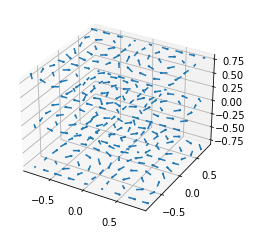

In [295]:
# sample code
import matplotlib.pyplot as plt
import numpy as np

ax = plt.figure().add_subplot(projection='3d')

# Make the grid
x, y, z = np.meshgrid(np.arange(-0.8, 1, 0.2),
                      np.arange(-0.8, 1, 0.2),
                      np.arange(-0.8, 1, 0.8))

# Make the direction data for the arrows
u = np.sin(np.pi * x) * np.cos(np.pi * y) * np.cos(np.pi * z)
v = -np.cos(np.pi * x) * np.sin(np.pi * y) * np.cos(np.pi * z)
w = (np.sqrt(2.0 / 3.0) * np.cos(np.pi * x) * np.cos(np.pi * y) *
     np.sin(np.pi * z))

ax.quiver(x, y, z, u, v, w, length=0.1, normalize=True)

plt.show()

## 円上接ベクトル

In [275]:
def circle_grid(res=20, r=1):
    phi = np.linspace(0, 2*np.pi, res)
    x = r * np.cos(phi)
    y = r * np.sin(phi)

    return x, y

def unit_tangent_vector2D(x, y):
    norm = np.sqrt(x**2+y**2)
    return -y/norm, x/norm

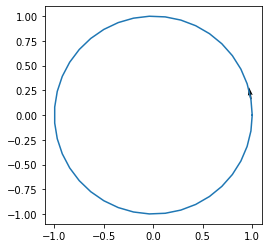

In [276]:
X, Y = circle_grid(40)
idx = np.random.randint(40)
x0, y0 = X[idx], Y[idx]
e_x, e_y = unit_tangent_vector2D(x0, y0)

fig, ax = plt.subplots()
# ax.scatter(x, y)
ax.quiver(x0, y0, e_x, e_y)
ax.plot(X, Y)
ax.set_aspect('equal')

## 球面接ベクトルと球面上ベクトル場

In [351]:
def to_decalto(theta, phi):
    return np.array(
        [
            np.sin(theta) * np.cos(phi),
            np.sin(theta) * np.sin(phi),
            np.cos(theta),
        ]
    )

def unit_tangent_vector3D(theta, phi):
     e_zz, e_z =  unit_tangent_vector2D(np.sin(theta), np.cos(theta))
     e_theta = np.array([e_zz * np.cos(phi), e_zz * np.sin(phi), e_z]) # (x, y)方向で分ける．
     if type(theta) == float:
        e_phi = np.array([*unit_tangent_vector2D(np.sin(theta) * np.cos(phi), np.sin(theta) * np.sin(phi)), 0])
     else:
        e_phi = np.stack([*unit_tangent_vector2D(np.sin(theta) * np.cos(phi), np.sin(theta) * np.sin(phi)), np.zeros(theta.shape)])
     return e_theta, e_phi

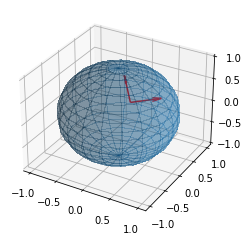

In [365]:
# 球面接ベクトル
ntheta, nphi = 20, 20
theta0, phi0 = np.pi / 4, -np.pi / 4 # specify a point on the unit sphere

THETA, PHI = np.mgrid[0 : np.pi : ntheta*1j, 0 : 2 * np.pi : nphi*1j]
X, Y, Z = to_decalto(THETA, PHI)

x = to_decalto(theta0, phi0)
e_theta, e_phi = unit_tangent_vector3D(theta0, phi0)

assert np.allclose(x @ e_theta, 0.0)
assert np.allclose(x @ e_phi, 0.0)

ax = plt.figure().add_subplot(projection='3d')
ax.plot_surface(X, Y, Z, alpha=0.3, antialiased=False)
ax.quiver3D(*to_decalto(theta0, phi0), *e_theta, colors='r', length=0.5)
ax.quiver3D(*to_decalto(theta0, phi0), *e_phi, colors='r', length=0.5)

In [361]:
def vfield(theta, phi, model=1):
    if model == 1:
        return np.random.rand(*theta.shape), np.random.rand(*theta.shape)
    if model == 2:
        return np.zeros(theta.shape), np.cos(theta)
    return np.cos(theta) * np.sin(2*phi), np.cos(theta)

(3, 30, 30)


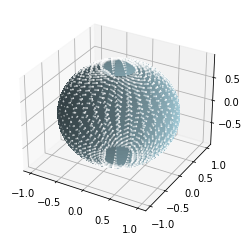

In [376]:
ntheta, nphi = 30, 30
e = 0.3
THETA, PHI = np.mgrid[e : np.pi-e : ntheta*1j, 0 : 2 * np.pi : nphi*1j]
X, Y, Z = to_decalto(THETA, PHI)

U, V = vfield(THETA, PHI, model=3)
e_THETA, e_PHI = unit_tangent_vector3D(THETA, PHI)
vfield_on_sphere = U*e_THETA + V*e_PHI
print(vfield_on_sphere.shape)

mask = Z > -1
ax = plt.figure().add_subplot(projection='3d')
ax.plot_surface(X, Y, Z, alpha=1.0, antialiased=False, color="lightblue")
ax.quiver3D(X[mask], Y[mask], Z[mask], *vfield_on_sphere[:, mask], colors='w', length=0.1, alpha=0.5)